In [1]:
import random

import pandas as pd
import numpy as np
import arviz as az
import pylab as plt
import statsmodels.api as sm

from tqdm import tqdm
from pymc3 import *
from scipy.stats import norm, ttest_ind
from scipy.interpolate import interp1d

import simulate_data.simulate_data as sd
import run_linear_data_analysis as rlda

In [2]:
ITERATIONS = 1000
TUNE = 2000
N_POST_SAMPLES = 50#100
NUMBER_OF_PREDICTORS = 2 # 10
RANDOM_SEED = 3#58

Y_0_1_NOISE = 1.0#0.3
LOG_ODDS_NOISE = 1.0#0.3

N_IN_STUDY = 500

In [3]:
iterations=ITERATIONS
tune=TUNE
n_post_samples=N_POST_SAMPLES
n_predictors=NUMBER_OF_PREDICTORS
n_in_study=N_IN_STUDY
y_0_1_noise=Y_0_1_NOISE
log_odds_noise=LOG_ODDS_NOISE
seed=RANDOM_SEED

In [4]:
# Create the Data
linear_data, true_beta_propensity_scores, true_beta_response, predictors = sd.make_basic_linear_data(
    p=n_predictors, N=n_in_study, 
    y_0_1_noise_scale=y_0_1_noise, 
    random_seed = seed
)

In [5]:
#Initialize Analysis Object
analysis_obj = rlda.linear_model_analysis(
    linear_data, 
    true_beta_propensity_scores, 
    true_beta_response, 
    predictors
)

In [6]:
# Fit Propensity Model
analysis_obj.fit_propensity_score_model(niter=iterations, tune=tune)
# Get Posterior of Propensity Model
ps_post_pred = analysis_obj.get_posterior_predictive(
    model_in=analysis_obj.propensity_score_model, 
    trace_in = analysis_obj.propensity_score_trace,
    var_names_in = ['propensity_score'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Beta]
Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 23 seconds.


In [7]:
# Fit Y_I_star Model with Mean Propensity Score
Y_i_star_mean_propensity_linear_model_model, Y_i_star_mean_propensity_linear_model_trace = (
    analysis_obj.fit_Y_i_star_mean_propensity_linear_model(niter=iterations, tune=tune))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, Beta]
Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 28 seconds.


In [8]:
# Fit Y_I_star_tilda Model with Mean Propensity Score
Y_i_star_tilda_mean_propensity_linear_model_model, Y_i_star_tilda_mean_propensity_linear_model_trace = (
    analysis_obj.fit_Y_i_star_tilda_mean_propensity_linear_model(niter=iterations, tune=tune))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, Beta]
Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 22 seconds.


In [9]:
# Fit Y_I_star Model with True Propensity Score
Y_i_star_true_propensity_linear_model_model, Y_i_star_true_propensity_linear_model_trace =(
    analysis_obj.fit_Y_i_star_true_propensity_linear_model(niter=iterations, tune=tune))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, Beta]
Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 22 seconds.


In [10]:
# Fit Y_I_star_tilda Model with True Propensity Score
Y_i_star_tilda_true_propensity_linear_model_model, Y_i_star_tilda_true_propensity_linear_model_trace =(
    analysis_obj.fit_Y_i_star_tilda_true_propensity_linear_model(niter=iterations, tune=tune))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, Beta]
Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 22 seconds.


In [11]:
# Fit Y_i_star Model with Posterior Based Propensity Scores
#analysis_obj.fit_Y_i_star_posterior_based_model(niter=iterations, tune=tune, n_post_samples=n_post_samples)

In [ ]:
# Fit Y_i_star_tilda Model with Posterior Based Propensity Scores
analysis_obj.fit_Y_i_star_tilda_posterior_based_model(niter=iterations, tune=tune, n_post_samples=n_post_samples)

  2%|▏         | 1/50 [00:23<19:11, 23.51s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


  4%|▍         | 2/50 [00:57<21:18, 26.63s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


  6%|▌         | 3/50 [01:30<22:23, 28.58s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


  8%|▊         | 4/50 [02:06<23:33, 30.74s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 10%|█         | 5/50 [02:40<23:52, 31.83s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 12%|█▏        | 6/50 [03:16<24:14, 33.06s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 14%|█▍        | 7/50 [03:50<23:56, 33.41s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 16%|█▌        | 8/50 [04:26<23:56, 34.20s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 18%|█▊        | 9/50 [05:04<23:57, 35.07s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 20%|██        | 10/50 [05:44<24:25, 36.63s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 22%|██▏       | 11/50 [06:24<24:25, 37.56s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 24%|██▍       | 12/50 [07:02<23:59, 37.87s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 26%|██▌       | 13/50 [07:42<23:46, 38.55s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 28%|██▊       | 14/50 [08:21<23:13, 38.72s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 30%|███       | 15/50 [09:02<22:57, 39.35s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 32%|███▏      | 16/50 [09:41<22:12, 39.18s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 34%|███▍      | 17/50 [10:19<21:19, 38.77s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 36%|███▌      | 18/50 [10:59<20:49, 39.06s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 38%|███▊      | 19/50 [11:39<20:20, 39.36s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 40%|████      | 20/50 [12:17<19:34, 39.16s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 42%|████▏     | 21/50 [12:56<18:52, 39.04s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 44%|████▍     | 22/50 [13:34<18:00, 38.57s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 46%|████▌     | 23/50 [14:14<17:33, 39.02s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 48%|████▊     | 24/50 [14:52<16:46, 38.71s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 50%|█████     | 25/50 [15:32<16:19, 39.20s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 52%|█████▏    | 26/50 [16:09<15:26, 38.59s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 54%|█████▍    | 27/50 [16:49<14:56, 38.98s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 56%|█████▌    | 28/50 [17:27<14:08, 38.57s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 58%|█████▊    | 29/50 [18:07<13:39, 39.03s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 60%|██████    | 30/50 [18:47<13:05, 39.29s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 62%|██████▏   | 31/50 [19:24<12:15, 38.71s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 64%|██████▍   | 32/50 [20:04<11:42, 39.02s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 66%|██████▌   | 33/50 [20:42<10:57, 38.68s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 68%|██████▊   | 34/50 [21:21<10:24, 39.03s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 70%|███████   | 35/50 [21:59<09:38, 38.55s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 72%|███████▏  | 36/50 [22:39<09:08, 39.16s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


 74%|███████▍  | 37/50 [23:19<08:30, 39.29s/it]

X_Beta shape= (500, 4000)
np.sqrt(Y_i_star_var) shape= (500,)


In [ ]:
sub_N = n_in_study-1
#X=analysis_obj.data[analysis_obj.predictors]
#posterir_fp_Tau = 
#    np.matmul(
#        X.to_numpy(), 
#        analysis_obj.Y_i_star_posterior_propensity_linear_model_trace.to_numpy().T
#    )
#fp_Tau = pd.DataFrame(posterir_fp_Tau.T)
#
plt.figure(figsize=(25,17))
### PLOT 1
#plt.subplot(3, 2, 1)
#plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
#temp_fp = fp_Tau.loc[:, :sub_N]
#x=analysis_obj.data.loc[:,'P(T=1)']
#y=fp_Tau.mean(axis=0)
#interval_high = np.quantile(fp_Tau, q=0.95, axis=0)
#interval_low = np.quantile(fp_Tau, q=0.05, axis=0)
#y_error= (interval_high - interval_low)/2
#_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
#_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x", color='red')
#mp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
#mp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
#coverage_mp = 1-(sum(mp_max_violation)+sum(mp_min_violation))/len(mp_min_violation)
#mil = str(round(np.mean(interval_high - interval_low),3))
#emp = fp_Tau.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
#rmse = str(round(np.sqrt(np.mean(emp*emp)), 3))    
#_=plt.title("Multi Posterior - Coverage:" + str(coverage_mp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
#plt.ylabel('Estimate Tau|X')
#plt.xlabel('True P(T=1)')

## PLOT 2
X=analysis_obj.data[analysis_obj.predictors]
posterir_fp_Tau_tilda = (
    np.matmul(
        X.to_numpy(), 
        analysis_obj.Y_i_star_tilda_posterior_propensity_linear_model_trace['Beta'].to_numpy().T
    )*analysis_obj.Y_i_star_tilda_posterior_propensity_linear_model_trace['Y_i_star_std'])
fp_Tau_tilda = pd.DataFrame(posterir_fp_Tau_tilda.T)
plt.subplot(3, 2, 2)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
temp_fp = fp_Tau.loc[:, :sub_N]
x=analysis_obj.data.loc[:,'P(T=1)']
y=fp_Tau_tilda.mean(axis=0)
interval_high = np.quantile(fp_Tau_tilda, q=0.95, axis=0)
interval_low = np.quantile(fp_Tau_tilda, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x", color='red')
mp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
mp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_mp = 1-(sum(mp_max_violation)+sum(mp_min_violation))/len(mp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
emp = fp_Tau.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(emp*emp)), 3))    
_=plt.title("Multi Posterior - Coverage:" + str(coverage_mp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Estimate Tau|X')
plt.xlabel('True P(T=1)')

## PLOT 3
plt.subplot(3, 2, 3)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
post_mean_Y_i_star_mean_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_mean_propensity_linear_model_model, 
    trace_in=Y_i_star_mean_propensity_linear_model_trace, 
    predictors=predictors))
x=analysis_obj.data.loc[:,'P(T=1)']
y=post_mean_Y_i_star_mean_propensity_linear_model_trace.mean(axis=0)
interval_high = np.quantile(post_mean_Y_i_star_mean_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_mean_propensity_linear_model_trace, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x", color='red')
sp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
sp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_sp = 1-(sum(sp_max_violation)+sum(sp_min_violation))/len(sp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
esp = post_mean_Y_i_star_mean_propensity_linear_model_trace.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(esp*esp)), 3))    
_=plt.title("Mean Prop. Score Posterior - Coverage:" + str(coverage_sp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Estimate Tau|X')
plt.xlabel('True P(T=1)')

## PLOT 4
plt.subplot(3, 2, 4)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
post_mean_Y_i_star_tilda_mean_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_tilda_mean_propensity_linear_model_model, 
    trace_in=Y_i_star_tilda_mean_propensity_linear_model_trace, 
    predictors=predictors, adjust_variance=True))
x=analysis_obj.data.loc[:,'P(T=1)']
y=post_mean_Y_i_star_tilda_mean_propensity_linear_model_trace.mean(axis=0)
interval_high = np.quantile(post_mean_Y_i_star_tilda_mean_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_tilda_mean_propensity_linear_model_trace, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x", color='red')
sp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
sp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_sp = 1-(sum(sp_max_violation)+sum(sp_min_violation))/len(sp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
esp = post_mean_Y_i_star_tilda_mean_propensity_linear_model_trace.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(esp*esp)), 3))    
_=plt.title("Mean Prop. Score Posterior - Coverage:" + str(coverage_sp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Variance Adjusted Estimate Tau|X')
plt.xlabel('True P(T=1)')

## PLOT 5
plt.subplot(3, 2, 5)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
post_mean_Y_i_star_true_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_true_propensity_linear_model_model, 
    trace_in=Y_i_star_true_propensity_linear_model_trace, 
    predictors=predictors))
x=analysis_obj.data.loc[:,'P(T=1)']
y=post_mean_Y_i_star_true_propensity_linear_model_trace.mean(axis=0)
interval_high = np.quantile(post_mean_Y_i_star_true_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_true_propensity_linear_model_trace, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x", color='red')
tp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
tp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_tp = 1-(sum(tp_max_violation)+sum(tp_min_violation))/len(tp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
etp = post_mean_Y_i_star_true_propensity_linear_model_trace.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(etp*etp)), 3))    
_=plt.title("True Prop Score Posterior - Coverage:" + str(coverage_tp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Estimate Tau|X')
plt.xlabel('True P(T=1)')


## PLOT 6
plt.subplot(3, 2, 6)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
post_mean_Y_i_star_tilda_true_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_tilda_true_propensity_linear_model_model, 
    trace_in=Y_i_star_tilda_true_propensity_linear_model_trace, 
    predictors=predictors, adjust_variance=True))
x=analysis_obj.data.loc[:,'P(T=1)']
y=post_mean_Y_i_star_tilda_true_propensity_linear_model_trace.mean(axis=0)
interval_high = np.quantile(post_mean_Y_i_star_tilda_true_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_tilda_true_propensity_linear_model_trace, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x", color='red')
tp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
tp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_tp = 1-(sum(tp_max_violation)+sum(tp_min_violation))/len(tp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
etp = post_mean_Y_i_star_tilda_true_propensity_linear_model_trace.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(etp*etp)), 3))    
_=plt.title("True Prop Score Posterior - Coverage:" + str(coverage_tp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Variance Adjusted Estimate Tau|X')
plt.xlabel('True P(T=1)')
plt.ylim((-4,6))

### Estimated Tau|X vs True Tau|X with 90% Cred. Intevals

In [ ]:
sub_N = n_in_study-1
X=analysis_obj.data[analysis_obj.predictors]
posterir_fp_Tau = np.matmul(
    X.to_numpy(), 
    analysis_obj.Y_i_star_posterior_propensity_linear_model_trace.to_numpy().T)
fp_Tau = pd.DataFrame(posterir_fp_Tau.T)

plt.figure(figsize=(25,17))
## PLOT 1
plt.subplot(3, 1, 1)
plt.hlines(
    0, xmin=min(analysis_obj.data.loc[:,'Tau']), 
    xmax=max(analysis_obj.data.loc[:,'Tau'])
    , colors='k', linestyles='solid')
temp_fp = fp_Tau.loc[:, :sub_N]
x=analysis_obj.data.loc[:,'Tau']
y=fp_Tau.mean(axis=0)
interval_high = np.quantile(fp_Tau, q=0.95, axis=0)
interval_low = np.quantile(fp_Tau, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x", color='red')
mp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
mp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_mp = 1-(sum(mp_max_violation)+sum(mp_min_violation))/len(mp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
emp = fp_Tau.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(emp*emp)), 3))    
_=plt.title("Multi Posterior - Coverage:" + str(coverage_mp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Estimate Tau|X')
plt.xlabel('True Tau')

## PLOT 2
plt.subplot(3, 1, 2)
plt.hlines(
    0, xmin=min(analysis_obj.data.loc[:,'Tau']), 
    xmax=max(analysis_obj.data.loc[:,'Tau'])
    , colors='k', linestyles='solid')
post_mean_Y_i_star_mean_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_mean_propensity_linear_model_model, 
    trace_in=Y_i_star_mean_propensity_linear_model_trace, 
    predictors=predictors))
x=analysis_obj.data.loc[:,'Tau']
y=post_mean_Y_i_star_mean_propensity_linear_model_trace.mean(axis=0)
interval_high = np.quantile(post_mean_Y_i_star_mean_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_mean_propensity_linear_model_trace, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x",color='red')
sp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
sp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_sp = 1-(sum(sp_max_violation)+sum(sp_min_violation))/len(sp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
esp = post_mean_Y_i_star_mean_propensity_linear_model_trace.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(esp*esp)), 3))    
_=plt.title("Mean Prop. Score Posterior - Coverage:" + str(coverage_sp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Estimate Tau|X')
plt.xlabel('True Tau')

## PLOT 3
plt.subplot(3, 1, 3)
plt.hlines(
    0, xmin=min(analysis_obj.data.loc[:,'Tau']), 
    xmax=max(analysis_obj.data.loc[:,'Tau'])
    , colors='k', linestyles='solid')
post_mean_Y_i_star_true_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_true_propensity_linear_model_model, 
    trace_in=Y_i_star_true_propensity_linear_model_trace, 
    predictors=predictors))
x=analysis_obj.data.loc[:,'Tau']
y=post_mean_Y_i_star_true_propensity_linear_model_trace.mean(axis=0)
interval_high = np.quantile(post_mean_Y_i_star_true_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_true_propensity_linear_model_trace, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x",color='red')
tp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
tp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_tp = 1-(sum(tp_max_violation)+sum(tp_min_violation))/len(tp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
etp = post_mean_Y_i_star_true_propensity_linear_model_trace.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(etp*etp)), 3))    
_=plt.title("True Prop Score Posterior - Coverage:" + str(coverage_tp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Estimate Tau|X')
plt.xlabel('True Tau')

### Credible Interval Length vs p-hat (Estimated P(T=1) )

In [ ]:
#sub_N = n_in_study-1
#X=analysis_obj.data[analysis_obj.predictors]
#posterir_fp_Tau = np.matmul(
#    X.to_numpy(), 
#    analysis_obj.Y_i_star_posterior_propensity_linear_model_trace.to_numpy().T)
#fp_Tau = pd.DataFrame(posterir_fp_Tau.T)

plt.figure(figsize=(25,17))
### PLOT 1
#plt.subplot(3, 1, 1)
#plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
#temp_fp = fp_Tau.loc[:, :sub_N]
##x=analysis_obj.data.loc[:,'Tau']
#x=analysis_obj.propensity_score_trace["propensity_score"].mean(axis=0)
#y=fp_Tau.mean(axis=0)
#interval_high = np.quantile(fp_Tau, q=0.95, axis=0)
#interval_low = np.quantile(fp_Tau, q=0.05, axis=0)
#y_error= (interval_high - interval_low)/2
#_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
#_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x", color='red')
#mp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
#mp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
#coverage_mp = 1-(sum(mp_max_violation)+sum(mp_min_violation))/len(mp_min_violation)
#mil = str(round(np.mean(interval_high - interval_low),3))
#emp = fp_Tau.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
#rmse = str(round(np.sqrt(np.mean(emp*emp)), 3))    
#_=plt.title("Multi Posterior - Coverage:" + str(coverage_mp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
#plt.ylabel('Estimate Tau|X')
#plt.xlabel('Estimate Mean P(T=1)')

## PLOT 2
plt.subplot(3, 1, 2)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
post_mean_Y_i_star_mean_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_mean_propensity_linear_model_model, 
    trace_in=Y_i_star_mean_propensity_linear_model_trace, 
    predictors=predictors))
#x=analysis_obj.data.loc[:,'Tau']
x=y=analysis_obj.propensity_score_trace["propensity_score"].mean(axis=0)
y=post_mean_Y_i_star_mean_propensity_linear_model_trace.mean(axis=0)
interval_high = np.quantile(post_mean_Y_i_star_mean_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_mean_propensity_linear_model_trace, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x",color='red')
sp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
sp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_sp = 1-(sum(sp_max_violation)+sum(sp_min_violation))/len(sp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
esp = post_mean_Y_i_star_true_propensity_linear_model_trace.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(esp*esp)), 3))    
_=plt.title("Mean Prop. Score Posterior - Coverage:" + str(coverage_sp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Estimate Tau|X')
plt.xlabel('Estimate Mean P(T=1)')

## PLOT 3
plt.subplot(3, 1, 3)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
post_mean_Y_i_star_true_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_true_propensity_linear_model_model, 
    trace_in=Y_i_star_true_propensity_linear_model_trace, 
    predictors=predictors))
x=analysis_obj.data.loc[:,'P(T=1)']
y=post_mean_Y_i_star_true_propensity_linear_model_trace.mean(axis=0)
interval_high = np.quantile(post_mean_Y_i_star_true_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_true_propensity_linear_model_trace, q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
_=plt.plot(x, analysis_obj.data.loc[:,'Tau'], "x",color='red')
tp_max_violation = interval_high < analysis_obj.data.loc[:, 'Tau']
tp_min_violation = interval_low > analysis_obj.data.loc[:, 'Tau']
coverage_tp = 1-(sum(tp_max_violation)+sum(tp_min_violation))/len(tp_min_violation)
mil = str(round(np.mean(interval_high - interval_low),3))
etp = post_mean_Y_i_star_true_propensity_linear_model_trace.mean(axis=0) - analysis_obj.data.loc[:, 'Tau']
rmse = str(round(np.sqrt(np.mean(etp*etp)), 3))    
_=plt.title("True Prop Score Posterior - Coverage:" + str(coverage_tp)+ "::RMSE:"+ rmse + ":::MIL:" + mil )
plt.ylabel('Estimate Tau|X')
plt.xlabel('True P(T=1)')

### Credible Interval Length vs True P(T=1)

In [ ]:
sub_N = n_in_study-1
X=analysis_obj.data[analysis_obj.predictors]
posterir_fp_Tau = np.matmul(
    X.to_numpy(), 
    analysis_obj.Y_i_star_posterior_propensity_linear_model_trace.to_numpy().T)
fp_Tau = pd.DataFrame(posterir_fp_Tau.T)

plt.figure(figsize=(25,10))
## PLOT 1
plt.subplot(2, 2, 1)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
temp_fp = fp_Tau.loc[:, :sub_N]
x=x=analysis_obj.data.loc[:,'P(T=1)']
interval_high = np.quantile(fp_Tau, q=0.95, axis=0)
interval_low = np.quantile(fp_Tau, q=0.05, axis=0)
y=interval_high-interval_low
lowess = sm.nonparametric.lowess(y, x, frac=.5)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]
f = interp1d(lowess_x, lowess_y, bounds_error=False)
ynew = f(x)
plt.plot(x, y, '.')
plt.plot(x, ynew, 'o')
plt.ylim((min(y),max(y)))
_=plt.title("p-hat Sampled Prop. Score Posterior")
plt.ylabel('Estimate Tau|X Interval Length')
plt.xlabel('True P(T=1)')

## PLOT 2
plt.subplot(2, 2, 2)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
post_mean_Y_i_star_mean_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_mean_propensity_linear_model_model, 
    trace_in=Y_i_star_mean_propensity_linear_model_trace, 
    predictors=predictors))
x=x=analysis_obj.data.loc[:,'P(T=1)']
y=post_mean_Y_i_star_mean_propensity_linear_model_trace.mean(axis=0)
interval_high = np.quantile(post_mean_Y_i_star_mean_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_mean_propensity_linear_model_trace, q=0.05, axis=0)
y=interval_high-interval_low
lowess = sm.nonparametric.lowess(y, x, frac=.5)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]
f = interp1d(lowess_x, lowess_y, bounds_error=False)
ynew = f(x)
plt.plot(x, y, '.')
plt.plot(x, ynew, 'o')
plt.ylim((min(y),max(y)))
_=plt.title("Mean p-hat Prop. Score Posterior")
plt.ylabel('Estimate Tau|X Interval Length')
plt.xlabel('True P(T=1)')

## PLOT 3
plt.subplot(2, 2, 3)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
post_mean_Y_i_star_true_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_true_propensity_linear_model_model, 
    trace_in=Y_i_star_true_propensity_linear_model_trace, 
    predictors=predictors))
x=x=analysis_obj.data.loc[:,'P(T=1)']
interval_high = np.quantile(post_mean_Y_i_star_true_propensity_linear_model_trace, q=0.95, axis=0)
interval_low = np.quantile(post_mean_Y_i_star_true_propensity_linear_model_trace, q=0.05, axis=0)
y=interval_high-interval_low
lowess = sm.nonparametric.lowess(y, x, frac=.5)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]
f = interp1d(lowess_x, lowess_y, bounds_error=False)
ynew = f(x)
plt.plot(x, y, '.')
plt.plot(x, ynew, 'o')
plt.ylim((min(y),max(y)))
_=plt.title("True Prop. Score Posterior")
plt.ylabel('Estimate Tau|X Interval Length')
plt.xlabel('True P(T=1)')

# Plot 4
plt.subplot(2, 2, 4)
x=analysis_obj.data.loc[:,'P(T=1)']
y=analysis_obj.propensity_score_trace["propensity_score"].mean(axis=0)
interval_high = np.quantile(analysis_obj.propensity_score_trace["propensity_score"], q=0.95, axis=0)
interval_low = np.quantile(analysis_obj.propensity_score_trace["propensity_score"], q=0.05, axis=0)
y_error= (interval_high - interval_low)/2
_=plt.errorbar(x, y, yerr=y_error, fmt="+")
_=plt.plot(x, x, "x")
plt.ylabel('p_hat with 90% cred. int.')
plt.xlabel('True P(T=1)')
plt.show()

### Tau-hat posterior Variance for p-hat sampled prop score vs Tau-hat posterior Variance for mean p-hat  prop score

Text(0.5, 0, 'Estimate Tau|X Varinace (mean p-hat)')

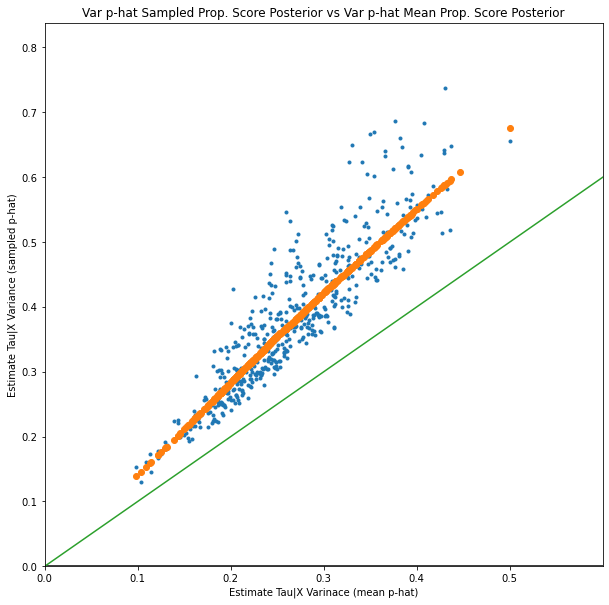

In [10]:
sub_N = n_in_study-1
X=analysis_obj.data[analysis_obj.predictors]
posterir_fp_Tau = np.matmul(
    X.to_numpy(), 
    analysis_obj.Y_i_star_posterior_propensity_linear_model_trace.to_numpy().T)
fp_Tau = pd.DataFrame(posterir_fp_Tau.T)
post_mean_Y_i_star_mean_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_mean_propensity_linear_model_model, 
    trace_in=Y_i_star_mean_propensity_linear_model_trace, 
    predictors=predictors))

plt.figure(figsize=(10,10))
## PLOT 1
#plt.subplot(2, 2, 1)
plt.hlines(0, xmin=0, xmax=1, colors='k', linestyles='solid')
temp_fp = fp_Tau.loc[:, :sub_N]
x=post_mean_Y_i_star_mean_propensity_linear_model_trace.var(axis=0)
y=np.var(temp_fp, axis=0)
lowess = sm.nonparametric.lowess(y, x, frac=.5)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]
f = interp1d(lowess_x, lowess_y, bounds_error=False)
ynew = f(x)
plt.plot(x, y, '.')
plt.plot(x, ynew, 'o')
plt.plot([0,max([max(y),max(x)])],[0,max([max(y),max(x)])])
plt.ylim((0,max(y)+.1))#((min(y),max(y)))
plt.xlim((0,max(x)+.1))#((min(y),max(y)))

_=plt.title("Var p-hat Sampled Prop. Score Posterior vs Var p-hat Mean Prop. Score Posterior")
plt.ylabel('Estimate Tau|X Variance (sampled p-hat)')
plt.xlabel('Estimate Tau|X Varinace (mean p-hat)')

In [11]:
ps = analysis_obj.data.loc[:,'P(T=1)']
quantiles = np.quantile(ps, q=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

Text(0.5, 0, 'T to C ratio bucketed by deciles')

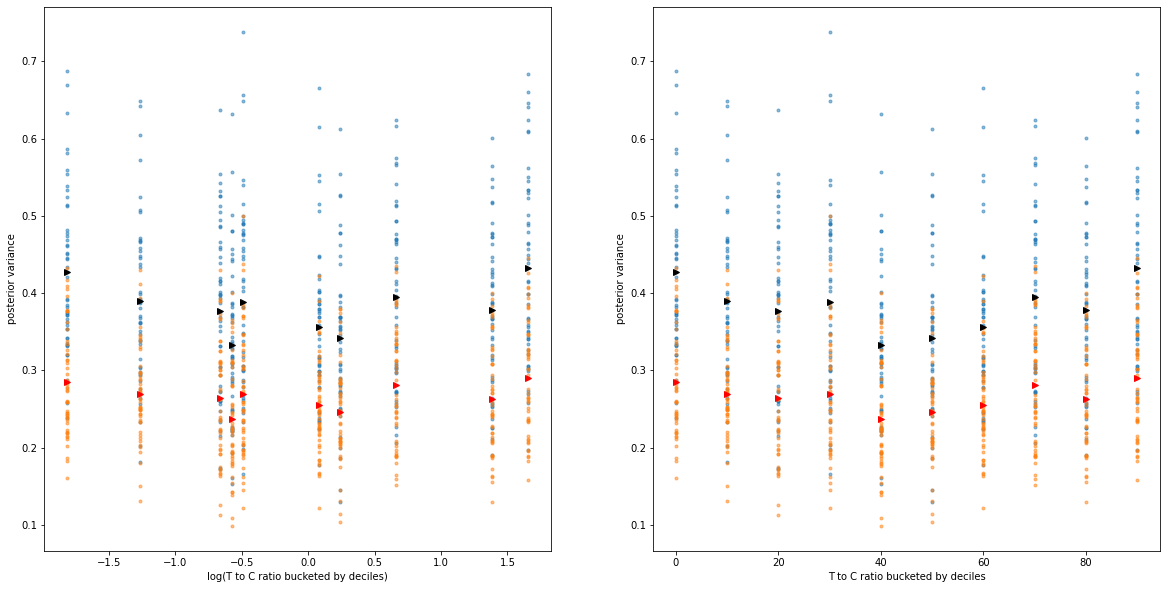

In [48]:
idx_0_10 = np.logical_and(ps>=0, ps<quantiles[0])
idx_10_20 = np.logical_and(ps>=quantiles[0], ps<quantiles[1])
idx_20_30 = np.logical_and(ps>=quantiles[1], ps<quantiles[2])
idx_30_40 = np.logical_and(ps>=quantiles[2], ps<quantiles[3])
idx_40_50 = np.logical_and(ps>=quantiles[3], ps<quantiles[4])
idx_50_60 = np.logical_and(ps>=quantiles[4], ps<quantiles[5])
idx_60_70 = np.logical_and(ps>=quantiles[5], ps<quantiles[6])
idx_70_80 = np.logical_and(ps>=quantiles[6], ps<quantiles[7])
idx_80_90 = np.logical_and(ps>=quantiles[7], ps<quantiles[8])
idx_90_100 = np.logical_and(ps>=quantiles[8], ps<1)

T_C_ratio = np.zeros(analysis_obj.data.shape[0])
T_C_ratio[idx_0_10] = sum(analysis_obj.data.loc[idx_0_10,'T'])/(-sum(analysis_obj.data.loc[idx_0_10,'T']-1))
T_C_ratio[idx_10_20] = sum(analysis_obj.data.loc[idx_10_20,'T'])/(-sum(analysis_obj.data.loc[idx_10_20,'T']-1))
T_C_ratio[idx_20_30] = sum(analysis_obj.data.loc[idx_20_30,'T'])/(-sum(analysis_obj.data.loc[idx_20_30,'T']-1))
T_C_ratio[idx_30_40] = sum(analysis_obj.data.loc[idx_30_40,'T'])/(-sum(analysis_obj.data.loc[idx_30_40,'T']-1))
T_C_ratio[idx_40_50] = sum(analysis_obj.data.loc[idx_40_50,'T'])/(-sum(analysis_obj.data.loc[idx_40_50,'T']-1))
T_C_ratio[idx_50_60] = sum(analysis_obj.data.loc[idx_50_60,'T'])/(-sum(analysis_obj.data.loc[idx_50_60,'T']-1))
T_C_ratio[idx_60_70] = sum(analysis_obj.data.loc[idx_60_70,'T'])/(-sum(analysis_obj.data.loc[idx_60_70,'T']-1))
T_C_ratio[idx_70_80] = sum(analysis_obj.data.loc[idx_70_80,'T'])/(-sum(analysis_obj.data.loc[idx_70_80,'T']-1))
T_C_ratio[idx_80_90] = sum(analysis_obj.data.loc[idx_80_90,'T'])/(-sum(analysis_obj.data.loc[idx_80_90,'T']-1))
T_C_ratio[idx_90_100] = sum(analysis_obj.data.loc[idx_90_100,'T'])/(-sum(analysis_obj.data.loc[idx_90_100,'T']-1))

T_C_ratio_label=np.zeros(analysis_obj.data.shape[0])
T_C_ratio_label[idx_0_10] = 0
T_C_ratio_label[idx_10_20]  = 10
T_C_ratio_label[idx_20_30]  = 20
T_C_ratio_label[idx_30_40]  = 30
T_C_ratio_label[idx_40_50]  = 40
T_C_ratio_label[idx_50_60]  = 50
T_C_ratio_label[idx_60_70]  = 60
T_C_ratio_label[idx_70_80]  = 70
T_C_ratio_label[idx_80_90]  = 80
T_C_ratio_label[idx_90_100] = 90

sub_N = n_in_study-1
X=analysis_obj.data[analysis_obj.predictors]
posterir_fp_Tau = np.matmul(
    X.to_numpy(), 
    analysis_obj.Y_i_star_posterior_propensity_linear_model_trace.to_numpy().T)
fp_Tau = pd.DataFrame(posterir_fp_Tau.T)
post_mean_Y_i_star_mean_propensity_linear_model_trace = pd.DataFrame(analysis_obj.get_posterior_mean(
    model_in=Y_i_star_mean_propensity_linear_model_model, 
    trace_in=Y_i_star_mean_propensity_linear_model_trace, 
    predictors=predictors))

plt.figure(figsize=(20,10))
## PLOT 1
plt.subplot(1, 2, 1)
plt.plot(np.log(T_C_ratio), fp_Tau.var(axis=0), '.', alpha=.5)
plt.plot(np.log(T_C_ratio), post_mean_Y_i_star_mean_propensity_linear_model_trace.var(axis=0), '.', alpha=.5)

df = pd.DataFrame(
    {
        'mean_post_mean_variance':post_mean_Y_i_star_mean_propensity_linear_model_trace.var(axis=0),
        'multi_post_mean_variance':fp_Tau.var(axis=0),
        'T_C_ratio':T_C_ratio,
        'T_C_ratio_label': T_C_ratio_label
    }
)


plt.plot(
    np.log(df.groupby('T_C_ratio_label').mean().T_C_ratio), 
    df.groupby('T_C_ratio_label').mean().multi_post_mean_variance,
    '>', color='black')
plt.plot(
    np.log(df.groupby('T_C_ratio_label').mean().T_C_ratio), 
    df.groupby('T_C_ratio_label').mean().mean_post_mean_variance,
    '>', color='red')
plt.ylabel('posterior variance')
plt.xlabel('log(T to C ratio bucketed by deciles)')
## PLOT 2
plt.subplot(1, 2, 2)
plt.plot((T_C_ratio_label), fp_Tau.var(axis=0), '.', alpha=.5)
plt.plot((T_C_ratio_label), post_mean_Y_i_star_mean_propensity_linear_model_trace.var(axis=0), '.', alpha=.5)
plt.plot(
    df.groupby('T_C_ratio_label').mean().index.values, 
    df.groupby('T_C_ratio_label').mean().multi_post_mean_variance,
    '>', color='black')
plt.plot(
    df.groupby('T_C_ratio_label').mean().index.values, 
    df.groupby('T_C_ratio_label').mean().mean_post_mean_variance,
    '>', color='red')
#plt.ylim((0,3))
plt.ylabel('posterior variance')
plt.xlabel('T to C ratio bucketed by deciles')

Text(0.5, 0, 'tau')

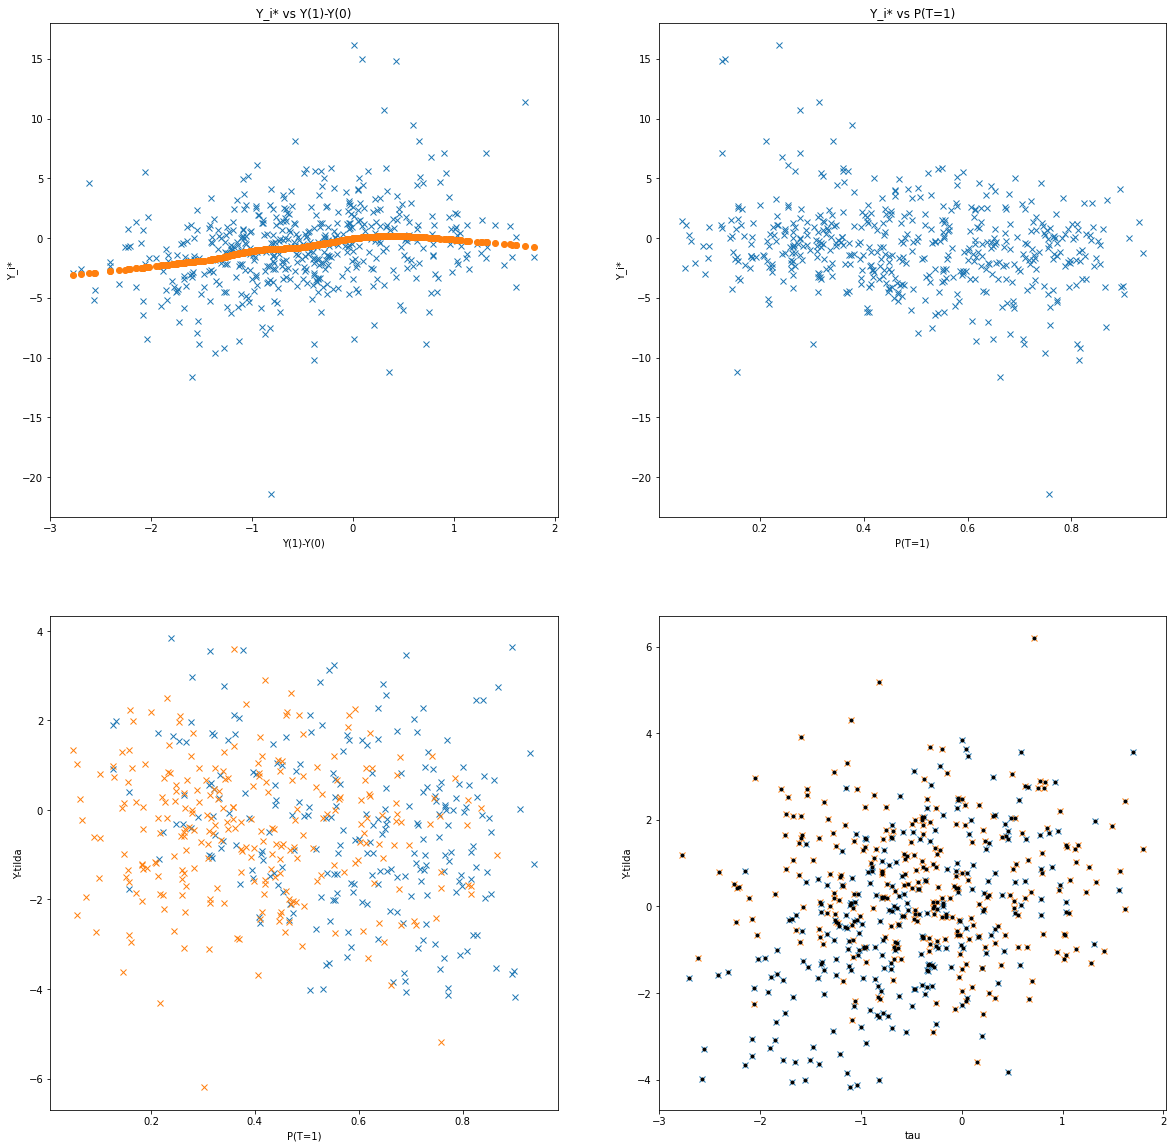

In [64]:
x=analysis_obj.data.loc[:,'Tau']
y=rlda.get_Y_i_star(
    Y_obs=analysis_obj.data.loc[:,'Y_obs'],
    W_i=analysis_obj.data.loc[:,'T'], 
    p=analysis_obj.data.loc[:,'P(T=1)'],
)
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.plot(x, y, 'x')
plt.title("Y_i* vs Y(1)-Y(0)")
plt.ylabel('Y_i*')
plt.xlabel('Y(1)-Y(0)')
#plt.ylim((-5,5))

#x=post_mean_Y_i_star_mean_propensity_linear_model_trace.var(axis=0)
#y=np.var(temp_fp, axis=0)
lowess = sm.nonparametric.lowess(y, x, frac=.5)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]
f = interp1d(lowess_x, lowess_y, bounds_error=False)
ynew = f(x)
plt.plot(x, ynew, 'o')

plt.subplot(2, 2, 2)
x=analysis_obj.data.loc[:,'P(T=1)']
plt.plot(x, y, 'x')
plt.title("Y_i* vs P(T=1)")
plt.ylabel('Y_i*')
plt.xlabel('P(T=1)')

plt.subplot(2, 2, 3)
x=analysis_obj.data.loc[:,'P(T=1)']
temp_y=analysis_obj.data.loc[:,'T']*y/(1/x)
plt.plot(x[temp_y!=0], temp_y[temp_y!=0], 'x')
temp_y=(1-analysis_obj.data.loc[:,'T'])*y/(1/(1-x))
plt.plot(x[temp_y!=0], temp_y[temp_y!=0], 'x')

#plt.title("Y_i* vs P(T=1)")
plt.ylabel('Y-tilda')
plt.xlabel('P(T=1)')

plt.subplot(2, 2, 4)
tau=analysis_obj.data.loc[:,'Tau']
temp_y=analysis_obj.data.loc[:,'T']*y/(1/x)
plt.plot(tau[temp_y!=0], temp_y[temp_y!=0], 'x')
temp_y=(analysis_obj.data.loc[:,'T']-1)*y/(1/(1-x))
plt.plot(tau[temp_y!=0], temp_y[temp_y!=0], 'x')

plt.plot(tau, analysis_obj.data.loc[:,'Y_obs'], '.', color='black')

#plt.title("Y_i* vs P(T=1)")
plt.ylabel('Y-tilda')
plt.xlabel('tau')

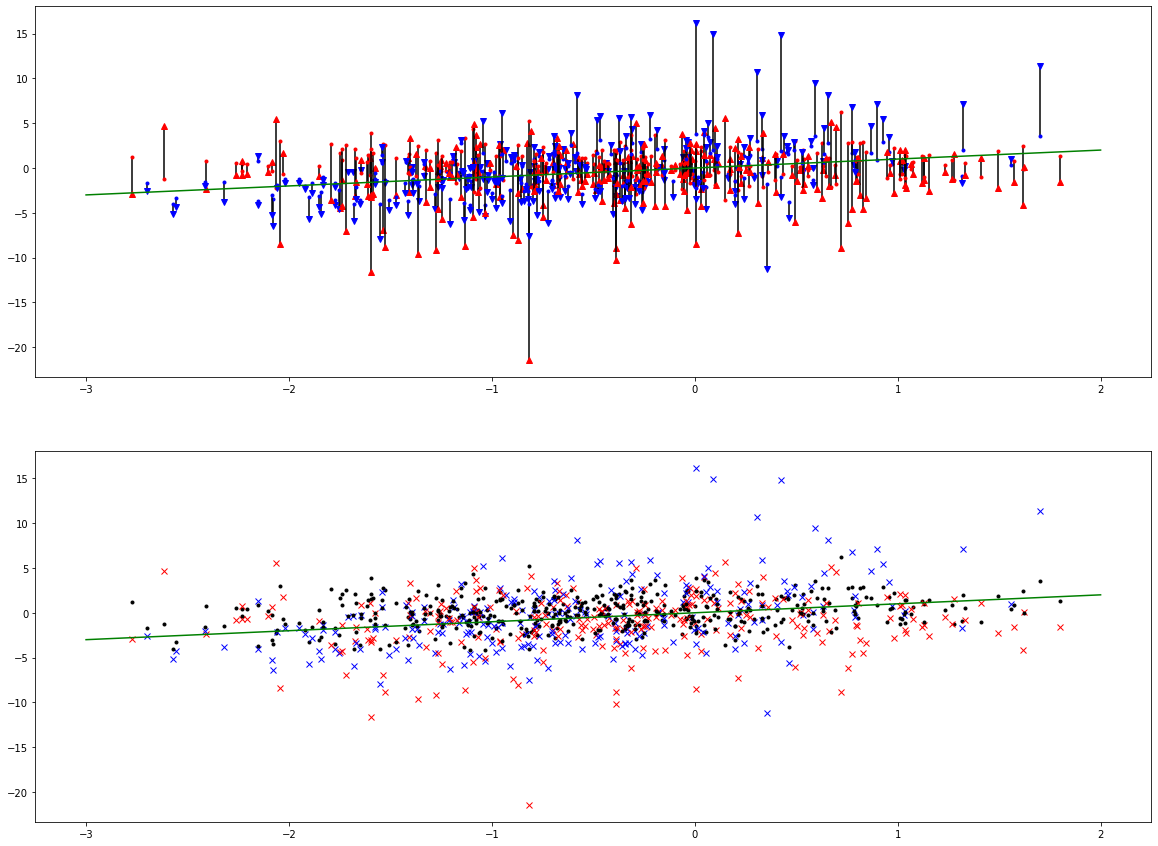

In [99]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)

Y_i_star=rlda.get_Y_i_star(
    Y_obs=analysis_obj.data.loc[:,'Y_obs'],
    W_i=analysis_obj.data.loc[:,'T'], 
    p=analysis_obj.data.loc[:,'P(T=1)'],
)
Y_obs=analysis_obj.data.loc[:,'Y_obs']
W=analysis_obj.data.loc[:, 'T']

for i in range(analysis_obj.data.shape[0]):
    
    x = [analysis_obj.data.loc[i, 'Tau'], analysis_obj.data.loc[i, 'Tau']]
    y = [Y_i_star[i], Y_obs[i]]
    plt.plot(x,y, 'k-')
    if W[i]==1:
        plt.plot(x[0],Y_i_star[i], 'v', color='blue')
        plt.plot(analysis_obj.data.loc[i, 'Tau'], analysis_obj.data.loc[i, 'Y_obs'], '.', color='blue')
    else:
        plt.plot(x[0],Y_i_star[i], '^', color='red')
        plt.plot(analysis_obj.data.loc[i, 'Tau'], analysis_obj.data.loc[i, 'Y_obs'], '.', color='red')

plt.plot([-3,2],[-3,2], color='green')

plt.subplot(2, 1, 2)
for i in range(analysis_obj.data.shape[0]):
    
    if W[i] == 1:
        term=analysis_obj.data.loc[i, 'P(T=1)']
        #print(Y_i_star[i]*term)
        x = [analysis_obj.data.loc[i, 'Tau'], analysis_obj.data.loc[i, 'Tau']]
        #print(x)
        y = [Y_i_star[i]*term, Y_obs[i]]
        #print(y)
        plt.plot(x,y, 'k-', color='black')
        plt.plot(x[0],Y_i_star[i], 'x', color='blue')
        plt.plot(analysis_obj.data.loc[i, 'Tau'], analysis_obj.data.loc[i, 'Y_obs'], '.', color='black')

    else:
        term=analysis_obj.data.loc[i, 'P(T=1)']-1
        x = [analysis_obj.data.loc[i, 'Tau'], analysis_obj.data.loc[i, 'Tau']]
        y = [Y_i_star[i]*term, Y_obs[i]]
        plt.plot(x,y, 'k-', color='black')
        plt.plot(x[0],Y_i_star[i], 'x', color='red')
        plt.plot(analysis_obj.data.loc[i, 'Tau'], analysis_obj.data.loc[i, 'Y_obs'], '.', color='black')
plt.plot([-3,2],[-3,2], color='green')

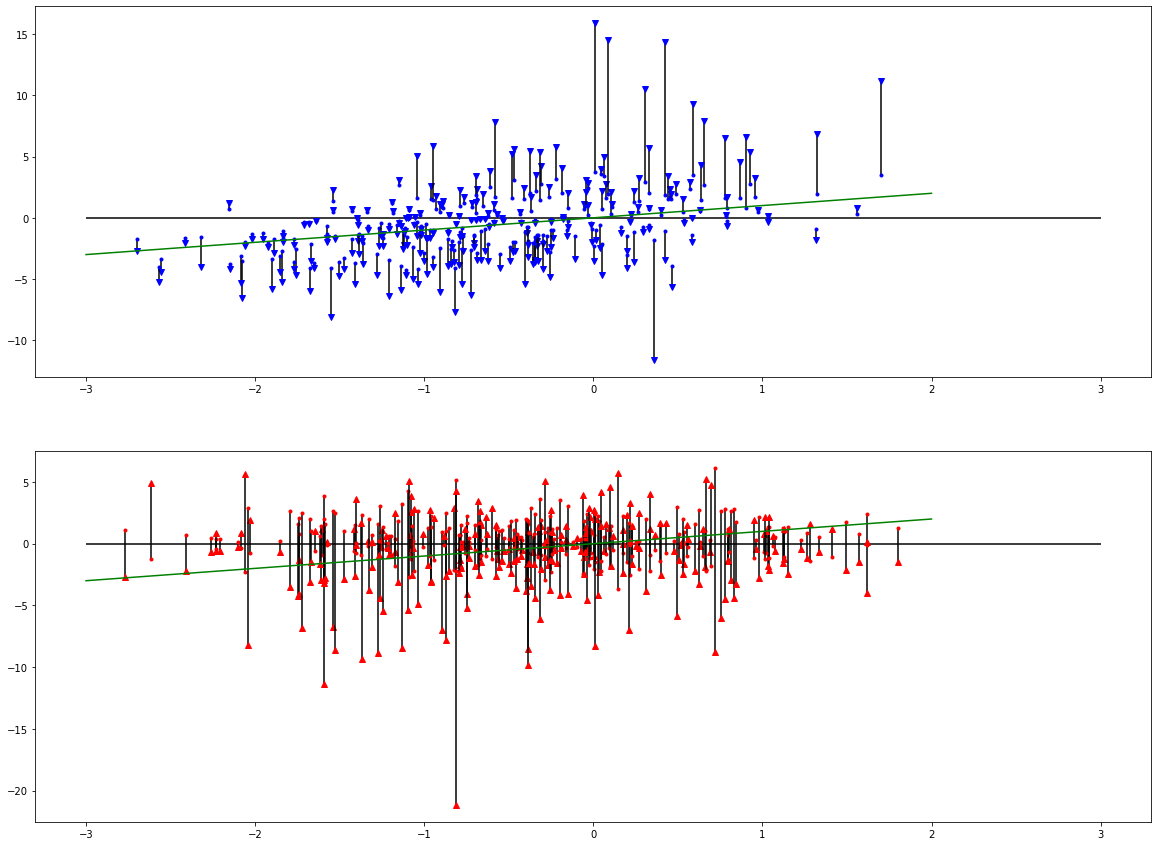

In [106]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)

Y_obs=analysis_obj.data.loc[:,'Y_obs']+20

Y_obs = Y_obs-np.mean(Y_obs)

Y_i_star=rlda.get_Y_i_star(
    Y_obs=Y_obs,
    W_i=analysis_obj.data.loc[:,'T'], 
    p=analysis_obj.data.loc[:,'P(T=1)'],
)
W=analysis_obj.data.loc[:, 'T']

for i in range(analysis_obj.data.shape[0]):
    
    x = [analysis_obj.data.loc[i, 'Tau'], analysis_obj.data.loc[i, 'Tau']]
    y = [Y_i_star[i], Y_obs[i]]
    
    if W[i]==1:
        plt.plot(x,y, 'k-')
        plt.plot(x[0],Y_i_star[i], 'v', color='blue')
        plt.plot(analysis_obj.data.loc[i, 'Tau'], Y_obs[i], '.', color='blue')
plt.plot([-3,2],[-3,2], color='green')
plt.hlines(y=0, xmin=-3, xmax=3)

plt.subplot(2, 1, 2)
for i in range(analysis_obj.data.shape[0]):
    
    x = [analysis_obj.data.loc[i, 'Tau'], analysis_obj.data.loc[i, 'Tau']]
    y = [Y_i_star[i], Y_obs[i]]
    if W[i]==0:
        plt.plot(x,y, 'k-')
        plt.plot(x[0],Y_i_star[i], '^', color='red')
        plt.plot(analysis_obj.data.loc[i, 'Tau'], Y_obs[i], '.', color='red')

plt.plot([-3,2],[-3,2], color='green')
plt.hlines(y=0, xmin=-3, xmax=3)



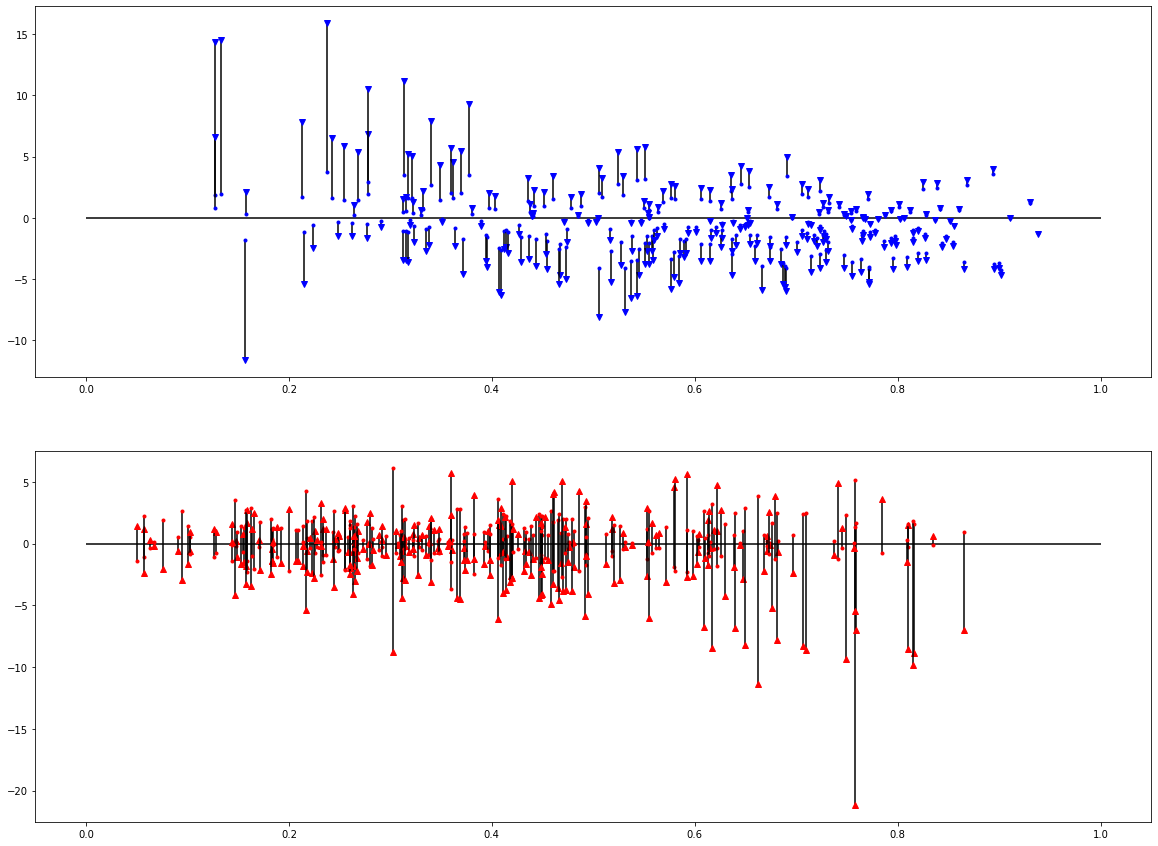

In [109]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)

Y_obs=analysis_obj.data.loc[:,'Y_obs']+20

Y_obs = Y_obs-np.mean(Y_obs)

Y_i_star=rlda.get_Y_i_star(
    Y_obs=Y_obs,
    W_i=analysis_obj.data.loc[:,'T'], 
    p=analysis_obj.data.loc[:,'P(T=1)'],
)
W=analysis_obj.data.loc[:, 'T']

for i in range(analysis_obj.data.shape[0]):
    
    x = [analysis_obj.data.loc[i, 'P(T=1)'], analysis_obj.data.loc[i, 'P(T=1)']]
    y = [Y_i_star[i], Y_obs[i]]
    
    if W[i]==1:
        plt.plot(x,y, 'k-')
        plt.plot(x[0],Y_i_star[i], 'v', color='blue')
        plt.plot(analysis_obj.data.loc[i, 'P(T=1)'], Y_obs[i], '.', color='blue')
#plt.plot([-3,2],[-3,2], color='green')
plt.hlines(y=0, xmin=0, xmax=1)

plt.subplot(2, 1, 2)
for i in range(analysis_obj.data.shape[0]):
    
    x = [analysis_obj.data.loc[i, 'P(T=1)'], analysis_obj.data.loc[i, 'P(T=1)']]
    y = [Y_i_star[i], Y_obs[i]]
    if W[i]==0:
        plt.plot(x,y, 'k-')
        plt.plot(x[0],Y_i_star[i], '^', color='red')
        plt.plot(analysis_obj.data.loc[i, 'P(T=1)'], Y_obs[i], '.', color='red')

#plt.plot([-3,2],[-3,2], color='green')
plt.hlines(y=0, xmin=0, xmax=1)


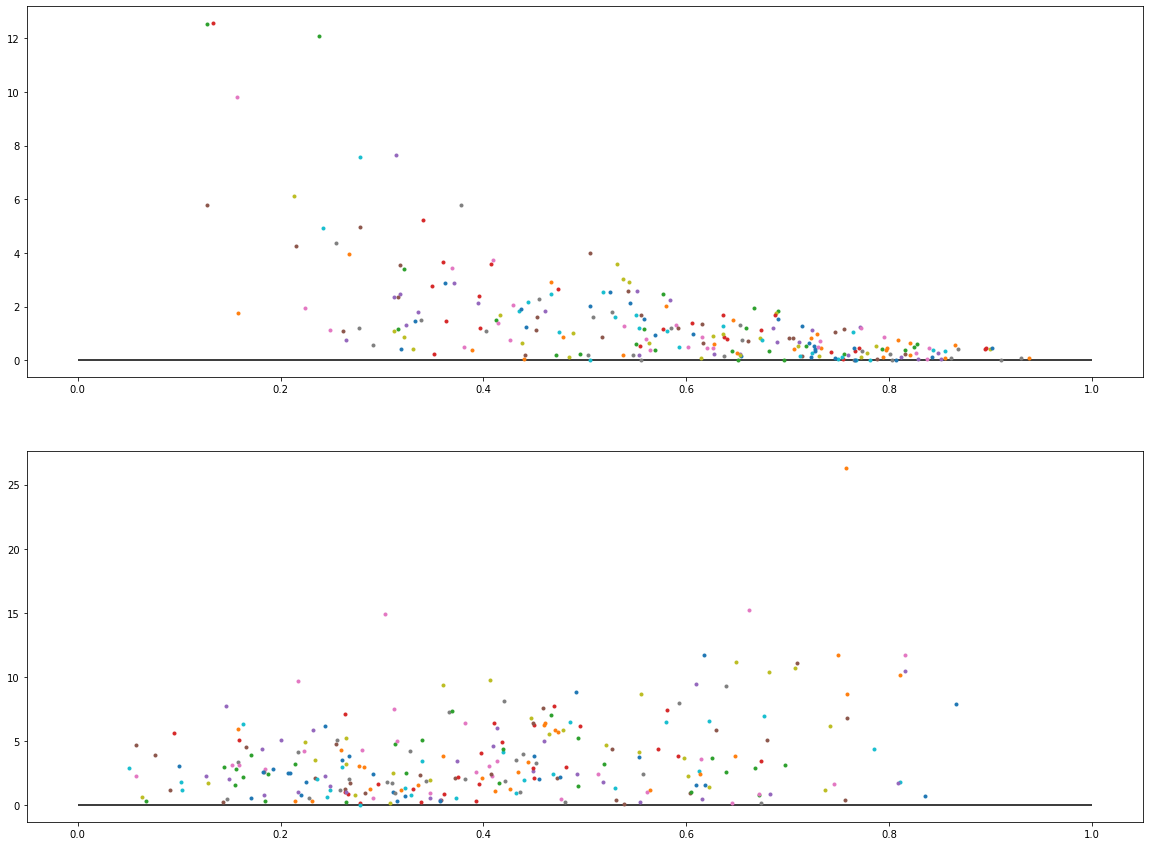

In [121]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)

Y_obs=analysis_obj.data.loc[:,'Y_obs']+20

Y_obs = Y_obs-np.mean(Y_obs)

Y_i_star=rlda.get_Y_i_star(
    Y_obs=Y_obs,
    W_i=analysis_obj.data.loc[:,'T'], 
    p=analysis_obj.data.loc[:,'P(T=1)'],
)
W=analysis_obj.data.loc[:, 'T']

for i in range(analysis_obj.data.shape[0]):
    
    x = analysis_obj.data.loc[i, 'P(T=1)']
    y = np.abs(Y_i_star[i] - Y_obs[i])
    
    if W[i]==1:
        plt.plot(x,y, '.')
        #plt.plot(x[0],Y_i_star[i], 'v', color='blue')
        #plt.plot(analysis_obj.data.loc[i, 'P(T=1)'], Y_obs[i], '.', color='blue')
#plt.plot([-3,2],[-3,2], color='green')
plt.hlines(y=0, xmin=0, xmax=1)

plt.subplot(2, 1, 2)
for i in range(analysis_obj.data.shape[0]):
    
    x = analysis_obj.data.loc[i, 'P(T=1)']
    y = np.abs(Y_i_star[i] - Y_obs[i])
    if W[i]==0:
        plt.plot(x,y, '.')
        #plt.plot(x[0],Y_i_star[i], '^', color='red')
        #plt.plot(analysis_obj.data.loc[i, 'P(T=1)'], Y_obs[i], '.', color='red')

#plt.plot([-3,2],[-3,2], color='green')
plt.hlines(y=0, xmin=0, xmax=1)


In [15]:
analysis_obj.data.head()

,V.0,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,...,Tau,P(T=1),T,Y_obs,mu_0,mu_1,var_1,Var(Y_i_star)_true,Y_i_star_true,Y_i_star_tilda_true
0,1,0.101596,0.416296,-0.418191,0.021655,0.785894,0.792586,-0.748829,-0.585514,-0.897066,...,-0.587271,0.653978,1,-0.211553,0.257083,-0.330188,1.0,4.431922,-0.323486,-0.153660
1,1,-0.118380,-0.940248,-0.086334,0.298288,-0.443025,0.352510,0.181726,-0.952036,0.117708,...,0.494606,0.491560,0,3.047624,1.410797,1.905403,1.0,15.056918,-5.994065,-1.544733
2,1,-0.481495,-0.169798,-0.432950,0.386276,-0.119093,-0.686265,0.089298,0.560630,-0.387273,...,-1.472363,0.647458,1,-0.410322,-0.229262,-1.701625,1.0,6.834430,-0.633744,-0.242417
3,1,-0.556084,-0.224057,0.872767,0.951991,0.344767,0.805668,0.691502,-0.244012,-0.815566,...,-0.043132,0.723031,0,2.312350,2.427818,2.384686,1.0,34.138290,-8.348772,-1.428900
4,1,0.306822,0.115682,-0.276870,-0.549891,-0.186960,-0.062120,-0.461529,-0.416414,-0.084627,...,-0.680935,0.493265,1,-2.377182,0.255776,-0.425159,1.0,4.032614,-4.819284,-2.399878
